In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='SimHei' #顯示中文
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline

train = pd.read_csv('train.csv', encoding = "utf-8")
test = pd.read_csv('test.csv', encoding = "utf-8")
train.columns
#train['SalePrice'].describe()

train_ID = train['Id']
test_ID = test['Id']

#刪除Id欄位因為不需要加到模型預測
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


# 相關性分析

  - 觀察特徵與'SalePrice'相關分析


C:\Users\emprise\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


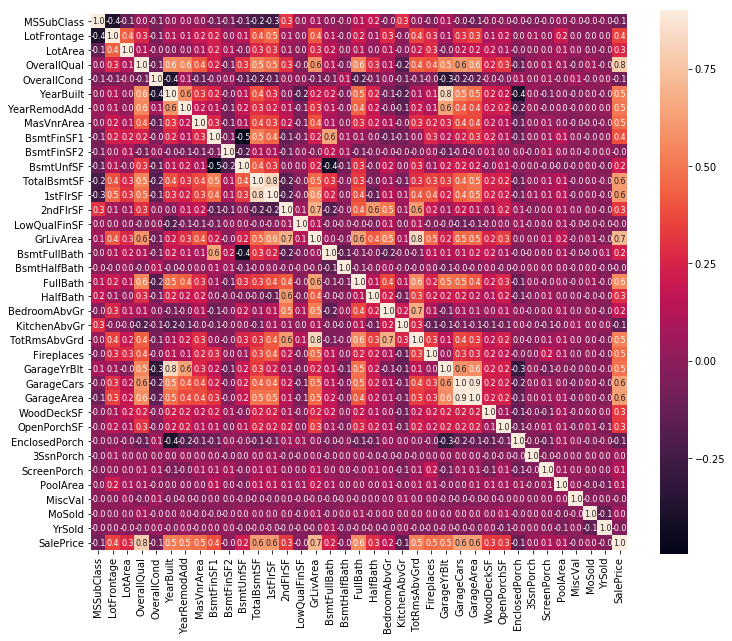

In [2]:
train.corr()
plt.subplots(figsize=(12,10))

#annot顯示coef值 
sns.heatmap(train.corr(), vmax=0.9, annot=True, annot_kws={'size': 8}, fmt='.1f', square=True)

In [3]:
#列出前二十與SalePrice正相關性最高的特徵
corr=train.corr().nlargest(20,['SalePrice'])
corr.sort_values(by = 'SalePrice',ascending=False)
corr.drop('SalePrice',axis=0).SalePrice


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

C:\Users\emprise\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


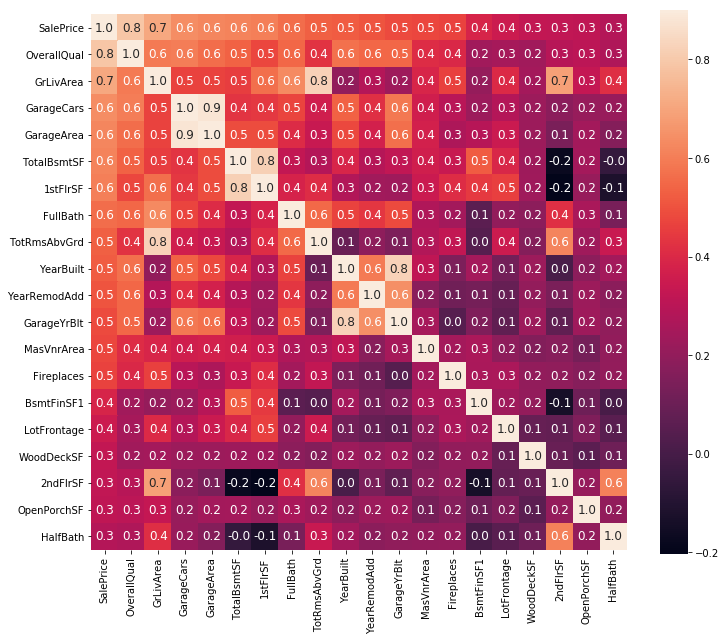

In [4]:
corr.sort_values(by = 'SalePrice',ascending=False)

plt.subplots(figsize=(12,10))

#annot顯示coef值 
sns.heatmap(corr[corr.index], vmax=0.9, annot=True, annot_kws={'size': 12}, fmt='.1f', square=True)


  - 以上熱圖可以知道 :

** 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt' 'YearRemodAdd' ** 等等

這些特徵跟我們的SalePrice正關聯性有達到高、中度相關




In [5]:
#列出前二十與SalePrice負相關性最高的特徵
corr_smallest=train.corr().nsmallest(20,['SalePrice'])
corr_smallest.sort_values(by = 'SalePrice',ascending=False)
corr_smallest


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenAbvGr,0.281721,-0.006069,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.081007,-0.040751,...,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,-0.135907
EnclosedPorch,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,0.036543,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YrSold,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,0.031706,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
LowQualFinSF,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.069071,-0.064503,0.014807,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,-0.025606
MiscVal,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,0.004940,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
BsmtHalfBath,-0.002333,-0.007234,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,0.067418,0.070948,...,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.016844
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
3SsnPorch,-0.043825,0.070029,0.020423,0.030371,0.025504,0.031355,0.045286,0.018796,0.026451,-0.029993,...,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584


  - 由負相關性方面來看所有特徵與SalePrice都是呈現低度負相關性。


C:\Users\emprise\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


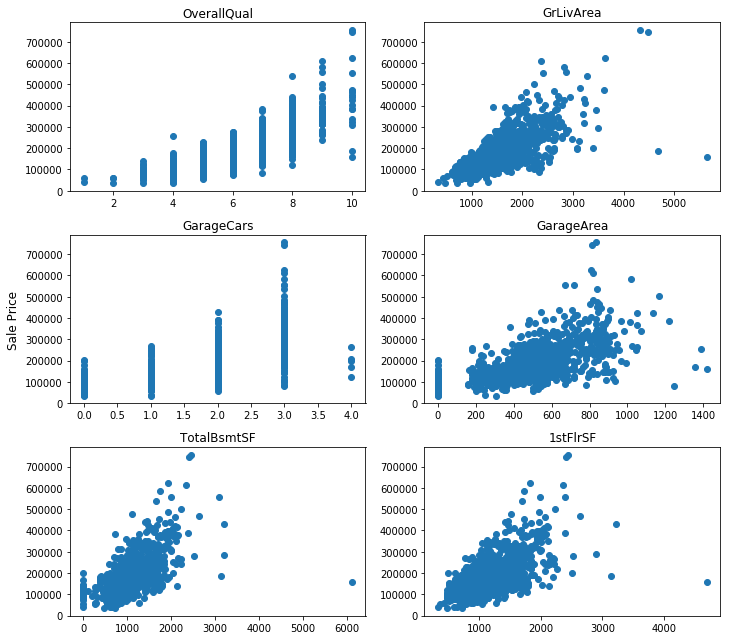

In [6]:

plt.figure(1)
fig, ax = plt.subplots(3, 2, figsize=(10, 9))
price = train.SalePrice.values
ax[0, 0].scatter(train.OverallQual.values, price)
ax[0, 0].set_title('OverallQual')
ax[0, 1].scatter(train.GrLivArea.values, price)
ax[0, 1].set_title('GrLivArea')
ax[1, 0].scatter(train.GarageCars.values, price)
ax[1, 0].set_title('GarageCars')
ax[1, 1].scatter(train.GarageArea.values, price)
ax[1, 1].set_title('GarageArea')
ax[2, 0].scatter(train.TotalBsmtSF.values, price)
ax[2, 0].set_title('TotalBsmtSF')
ax[2, 1].scatter(train['1stFlrSF'].values, price)
ax[2, 1].set_title('1stFlrSF')

fig.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

# 將train data與test data合併分析

In [7]:
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("All data shape = ",all_data.shape)

All data shape =  (2919, 79)


In [8]:
all_data.isnull().sum().sort_values(ascending=False)


PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

# 缺失值處理

  - 觀察資料是否存在缺失值，如果有則需要做預處理。

In [9]:
data_na = (all_data.isnull().sum() / len(all_data)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
data_na = data_na.drop(data_na[data_na==0].index).sort_values(ascending=False)
missing_data=pd.concat([data_na], axis=1, keys=['Percent of NA'])
missing_data

,Percent of NA
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


  - Missing vales較高的特徵有
** 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' **  
接下來我們針對含有缺失值的特徵做預處理，依照資料的型態補齊na。

In [10]:
# all_data.corr()
# plt.subplots(figsize=(12,10))
# sns.heatmap(all_data.corr(), vmax=0.8, annot=True, annot_kws={'size': 8}, fmt='.1f', square=True)

  - 由熱圖觀察含有Missing Data的特徵對於其他的特徵有到中度相關性，故這些欄位需要做預處理，不可直接刪除。

In [11]:
#觀察資料型態
all_data[missing_data.index].dtypes


PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageQual       object
GarageCond       object
GarageFinish     object
GarageYrBlt     float64
GarageType       object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
MSZoning         object
BsmtFullBath    float64
BsmtHalfBath    float64
Utilities        object
Functional       object
Electrical       object
BsmtUnfSF       float64
Exterior1st      object
Exterior2nd      object
TotalBsmtSF     float64
GarageArea      float64
GarageCars      float64
BsmtFinSF2      float64
BsmtFinSF1      float64
KitchenQual      object
SaleType         object
dtype: object

In [12]:
#為類別資料做ont-hot encoding
all_data = pd.get_dummies(all_data)

#缺失值用mean()填充
all_data = all_data.fillna(all_data.mean())


In [13]:
#檢查資料na
all_data.isnull().sum().max()

0

# 為了讓模型訓練容易將資料做標準化

In [14]:
all_data = preprocessing.StandardScaler().fit_transform(all_data)

# Model - RandomForestRegressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [16]:
#全部資料拆分train , test
x = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]
y = train.SalePrice


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=200)
#實例一個RandomForestRegressor的object
rfr=RandomForestRegressor(n_estimators=10, bootstrap=True)
rfr.fit(x_train,y_train)
pred=rfr.predict(test)


#預測結果儲存csv
submission = pd.DataFrame({'Id':test_ID,'SalePrice':pred})
submission.to_csv("MySubmission.csv",index = False)
